<a href="https://colab.research.google.com/github/Rocyan4/Data_science/blob/master/Wordcloud_linkedin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
from string import punctuation
!pip install wordcloud 
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import matplotlib.pyplot as plt
% matplotlib inline



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/My Drive/olist_order_reviews_dataset.csv")

In [4]:
data.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [6]:
colunas_selecionadas =  ['review_comment_message']

In [7]:
dataset_final = data.filter(items=colunas_selecionadas)

In [ ]:
dataset_final.head(100000)

,review_comment_message
0,NaN
1,NaN
2,NaN
3,Recebi bem antes do prazo estipulado.
4,Parabéns lojas lannister adorei comprar pela I...
...,...
99995,NaN
99996,"Excelente mochila, entrega super rápida. Super..."
99997,NaN
99998,Solicitei a compra de uma capa de retrovisor c...


In [8]:
palavras = dataset_final.dropna(subset=['review_comment_message'], axis=0)['review_comment_message']
palavras

3                    Recebi bem antes do prazo estipulado.
4        Parabéns lojas lannister adorei comprar pela I...
9        aparelho eficiente. no site a marca do aparelh...
12         Mas um pouco ,travando...pelo valor ta Boa.\r\n
15       Vendedor confiável, produto ok e entrega antes...
                               ...                        
99983    Entregou dentro do prazo. O produto chegou em ...
99990    O produto não foi enviado com NF, não existe v...
99996    Excelente mochila, entrega super rápida. Super...
99998    Solicitei a compra de uma capa de retrovisor c...
99999    meu produto chegou e ja tenho que devolver, po...
Name: review_comment_message, Length: 41753, dtype: object

In [9]:
palavras_totais = " ".join(s for s in palavras)
print("Quantidade de Palavras: {}".format(len(palavras_totais)))

Quantidade de Palavras: 2966075


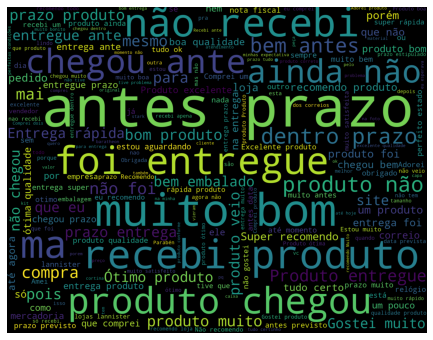

In [10]:
#excluindo palavras que não quero usar
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1800, height=1400).generate(palavras_totais)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("palavras_ecommerce.png")


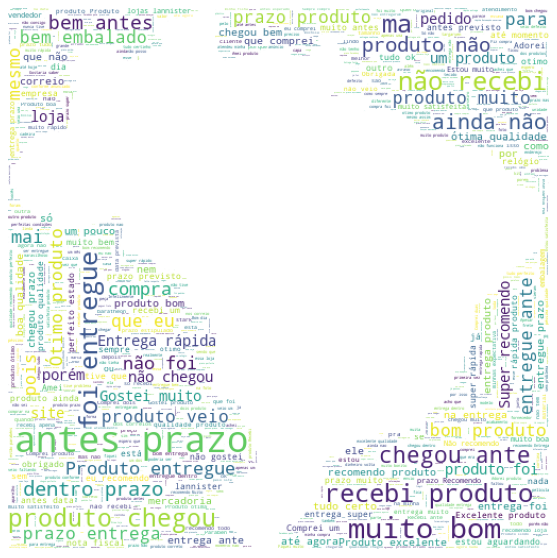

In [11]:

# endereço LOCAL da SUA imagem
mapa = np.array(Image.open("/content/drive/My Drive/brazil-map.png"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1000, height=1000, max_words=2000,
                      mask=mapa, max_font_size=200,
                      min_font_size=1).generate(palavras_totais)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)

wordcloud.to_file("mapa.png")

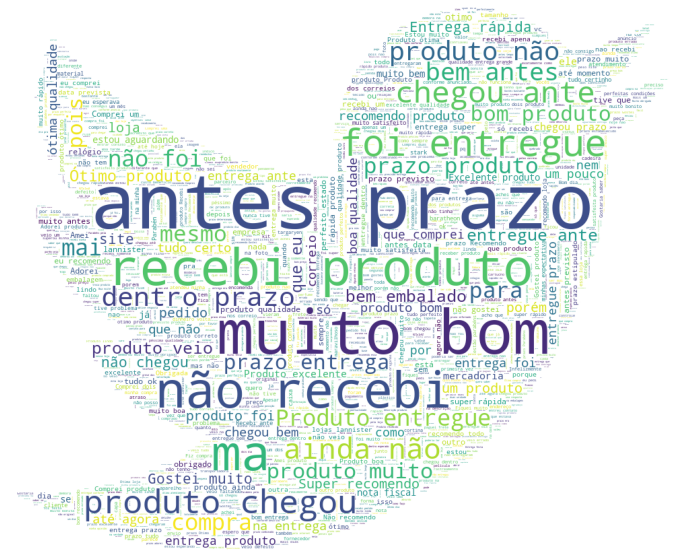

In [14]:

# endereço LOCAL da SUA imagem
nuvem_p = np.array(Image.open("/content/drive/My Drive/twitter.png"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color=('white'),
                      width=1800, height=1400, max_words=2000,
                      mask=nuvem_p, max_font_size=200,
                      min_font_size=1).generate(palavras_totais)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("nuvem_tt.png")

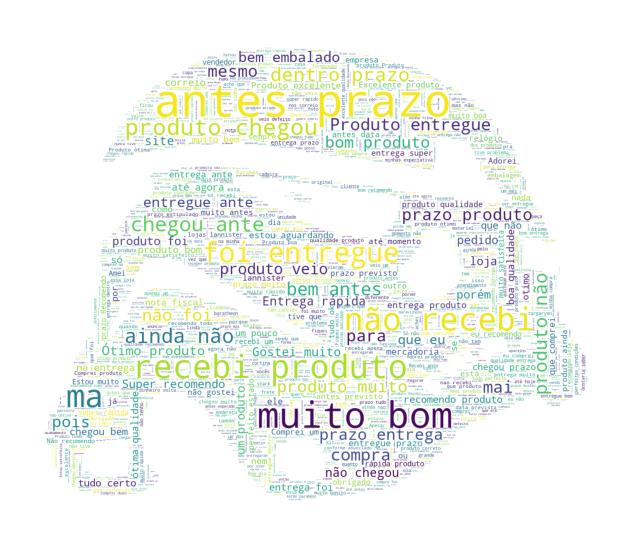

In [13]:
# endereço LOCAL da SUA imagem
sw = np.array(Image.open("/content/drive/My Drive/stormtrooper_mask.png"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color=('white'),
                      width=1800, height=1400, max_words=2000,
                      mask=sw, max_font_size=200,
                      min_font_size=1).generate(palavras_totais)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("nuvem_.png")